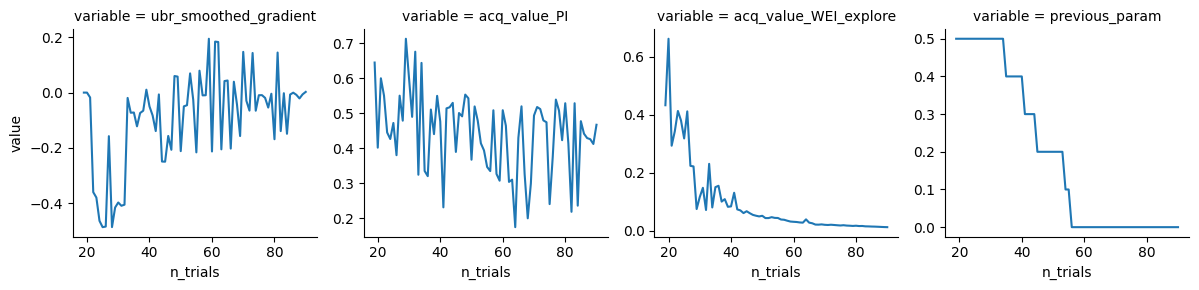

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from carps.analysis.gather_data import read_jsonl_content

fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/BBOB/bbob/2/1/0/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/3/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI-P/BNNBO/bnnbo/TensionCompressionString/3/DACBOEnvLogs.jsonl"
obs = read_jsonl_content(fn)
obs_keys = list(obs.iloc[0]["observation"].keys())
expanded = obs["observation"].apply(pd.Series)
expanded.columns = obs_keys
obs = obs.drop(columns="observation").join(expanded)
# obs["exploring"] = obs["acq_value_PI"] <= obs["acq_value_WEI_explore"]
# obs["diff_EI"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
# obs["diff"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
obs_wide = obs.copy()
obs = obs.melt(id_vars=["n_trials"], value_vars=obs_keys)


grid = sns.FacetGrid(data=obs, col="variable", col_wrap=5, sharex=True, sharey=False)
grid.map_dataframe(sns.lineplot, x="n_trials", y="value")
# grid.axes.flat[-2].set_yscale("log")
plt.show()

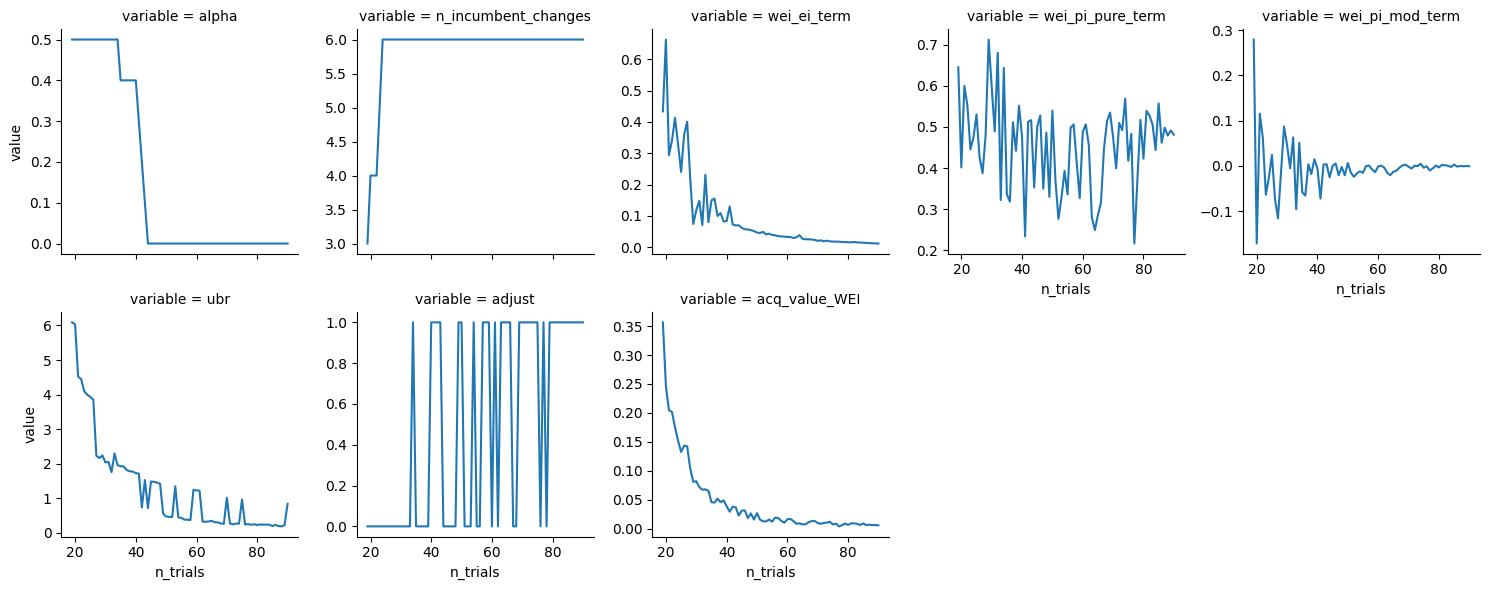

In [15]:
sawei_fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runs_eval/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/3/3/smac3_output/9bf2a0b7bf2d61997de5c52ddb47577f/3/sawei_history.csv"
sawei_fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runs_eval/SAWEI/BNNBO/bnnbo/TensionCompressionString/3/3/smac3_output/ff08a3fe635487c1078dbd55e3c35c2e/3/sawei_history.csv"
sawei_hist = pd.read_csv(sawei_fn)
sawei_hist = sawei_hist.rename(columns={"n_evaluated": "n_trials"})
obs_keys = [c for c in sawei_hist.columns if c != "n_trials"]
sawei_hist["acq_value_WEI"] = 0.5 * (sawei_hist["wei_pi_mod_term"] + sawei_hist["wei_ei_term"])
sawei_hist_long = sawei_hist.melt(id_vars=["n_trials"], value_vars=obs_keys + ["acq_value_WEI"])

grid = sns.FacetGrid(data=sawei_hist_long, col="variable", col_wrap=5, sharex=True, sharey=False)
grid.map_dataframe(sns.lineplot, x="n_trials", y="value")
plt.show()

<Axes: xlabel='n_trials', ylabel='diff'>

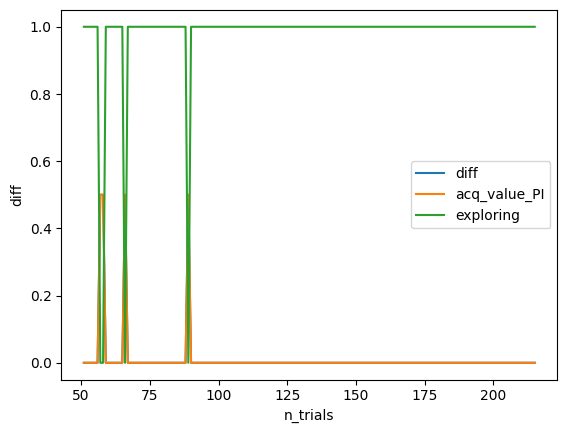

In [51]:
sns.lineplot(data=obs_wide, x="n_trials", y="diff", label="diff")
sns.lineplot(data=obs_wide, x="n_trials", y="acq_value_PI", label="acq_value_PI")
sns.lineplot(data=obs_wide, x="n_trials", y="exploring", label="exploring")
# sns.lineplot(data=obs_wide, x="n_trials", y="diff_EI", label="diff_EI")